# Neural network practice

Lets create 2 layer neural network and train it with public dataset

In [1]:
import numpy as np
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [2]:
'''
MNIST is simple image open source dataset with 0-9 written digits. Each image has (28,28) shape
'''
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [3]:
'''
MNIST properties
'''
print('***** Dataset info ******')
print(mnist_trainset)
print(mnist_testset)
print()
print('***** Single element in the dataset ******')
print(f'X sample is : {mnist_trainset[0][0]}')
print(f'y sample is : {mnist_trainset[0][1]}')

***** Dataset info ******
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test

***** Single element in the dataset ******
X sample is : <PIL.Image.Image image mode=L size=28x28 at 0x1F62BA7B190>
y sample is : 5


# Visualize

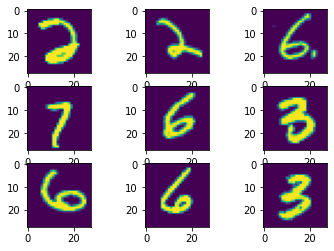

In [4]:
'''
Visualize few images from the dataset
'''
row_number = 3
column_number = 3
inds = np.random.randint(0, 60000, row_number*column_number)
imgs = [mnist_trainset[i][0] for i in inds]
fig, axes = plt.subplots(row_number,column_number)
for i in range(row_number):
    for j in range(column_number):
        axes[i][j].imshow(imgs[i*column_number + j])

In [5]:
'''
Preprocess images to make them numpy arrays for the neural network
YOUR CODE BELLOW
'''
def preprocess_images(dataset):
    '''
    param dataset: MNIST dataset
    
    return parameter should be numpy.array
    '''
    # from torch.utils.data import DataLoader
    
    # train_loader = DataLoader(dataset, batch_size=len(dataset))

    # data_array = next(iter(train_loader))[0].numpy()
    # label_array = next(iter(train_loader))[1].numpy()
    
    data_array = dataset.data.numpy()
    label_array = dataset.targets.numpy()
    num_datapoins = data_array.shape[0]
    num_pixels = (28*28)  # 784 pixels in each image
    
    X = data_array.reshape(num_datapoins, num_pixels)
    Y = label_array
    
    # print(data_array.shape)
    # print(label_array.shape)

    return X, Y

X_trainset, y_trainset = preprocess_images(mnist_trainset)
X_test, y_test = preprocess_images(mnist_testset)

In [6]:
# Check if the preprocessing done correct
assert X_trainset.shape == (60000, 784)
assert y_trainset.shape == (60000,)
assert X_test.shape == (10000, 784)
assert y_test.shape == (10000,)

# Define your model

You need to create 2 layer fully connected neural network. Activation function will be ReLU.

In [7]:
from neural_net import TwoLayerNet
from time import time

In [8]:
'''
You need to define your parameters for your network
YOUR CODE BELLOW
'''
input_size = 784
hidden_size = 100
output_size = 10

nn_model = TwoLayerNet(input_size, hidden_size, output_size)

# Train model

Below you will start to train your model

In [9]:
'''
YOUR CODE BELLOW
'''
def train_val_split(X, y, ratio=0.8):
    '''
    param X: trainset features
    param y: trainset labels
    param ratio: Train-val split ratio
    
    return splitted matricies as numpy.array's
    '''
    choice = np.random.choice(X.shape[0], int(ratio*X.shape[0]), replace=False)
    mask = np.ones(len(X), dtype=bool)  # allows further use of mask.
    mask[choice] = False

    X_train, y_train,  = X[~mask], y[~mask]
    X_val, y_val = X[mask], y[mask]
    
    # X_val = np.delete(X, choice, axis=0)

    # print(choice.size)
    # print(mask.size)
    # print (len(X_train), len(y_train))
    # print (len(X_val), len(y_val))
    
    return X_train, y_train, X_val, y_val

In [10]:
X_train, y_train, X_val, y_val = train_val_split(X_trainset, y_trainset, 0.7)

In [11]:
learning_rate = 1e-4
batch_size = 4
num_iters = 1000

In [12]:
t1 = time()
results = nn_model.train(X_train, y_train, X_val, y_val, learning_rate, batch_size, num_iters)
t2 = time()
print(f'It took {t2-t1} seconds to train model')

X shape[0]: 4
X shape; (4, 784)
Loss values are: inf
Grad values are: {'W2': array([[   0.        ,           nan,    0.        ,    0.        ,
           0.        ,           nan,    0.        ,    0.        ,
                  nan,    0.        ],
       [ -31.41811902,           nan,    0.        ,    0.        ,
           0.        ,           nan,    0.        ,  -18.55542088,
                  nan,    0.        ],
       [-137.95241494,           nan,    0.        ,  -19.75385164,
           0.        ,           nan,    0.        ,    0.        ,
                  nan,    0.        ],
       [-202.25925397,           nan,    0.        ,  -96.64420042,
           0.        ,           nan,    0.        ,  -85.41579433,
                  nan,    0.        ],
       [-187.39013086,           nan,    0.        ,    0.        ,
           0.        ,           nan,    0.        ,  -14.25792343,
                  nan,    0.        ],
       [   0.        ,           nan,    0.     

c:\Users\taronhov\Downloads\BAJ\NN\neural_net.py:79: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(scores)      # (N, C)
c:\Users\taronhov\Downloads\BAJ\NN\neural_net.py:81: RuntimeWarning: invalid value encountered in true_divide
  out = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
c:\Users\taronhov\Downloads\BAJ\NN\neural_net.py:84: RuntimeWarning: divide by zero encountered in log
  corect_logprobs = -np.log(out[np.arange(N), y])


X shape[0]: 4
X shape; (4, 784)
Loss values are: nan
Grad values are: {'W2': array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, 

# Results

Lets plot loss, train accuracy and validation accuracy

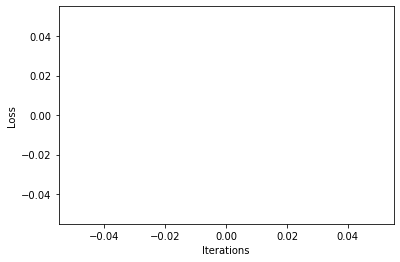

[inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [14]:
plt.plot(np.arange(len(results['loss_history'])), results['loss_history'])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

print(results['loss_history'])
# print(results['train_acc_history'])
# print(results['val_acc_history'])

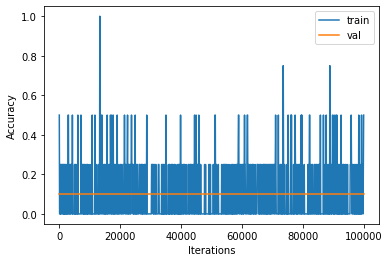

In [15]:
plt.plot(np.arange(len(results['train_acc_history']))*100, results['train_acc_history'],label='train')
plt.plot(np.arange(len(results['val_acc_history']))*100, results['val_acc_history'], label='val')
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Test model

Finally we can test trained model on test dataset

In [24]:
y_pred = nn_model.predict(X_test)
test_acc = (y_pred == y_test).mean()*100
print(f'Your model test accuracy is : {test_acc}%')

print(y_pred)

Your model test accuracy is : 9.8%
[0 0 0 ... 0 0 0]
